## KerasTuner Hyperparameter Tunning

### Keras Tuner is a great tool for hyperparameter optimization in Keras models, which helps you decide on the number of layers, number of neurons, optimizer, and activation functions to use in your model.

### KerasTuner find best hyperparameter values for your models like How many layers need to be created  , how much neurons to be create , How much % dropout is needed in model(deactivate the neurons)

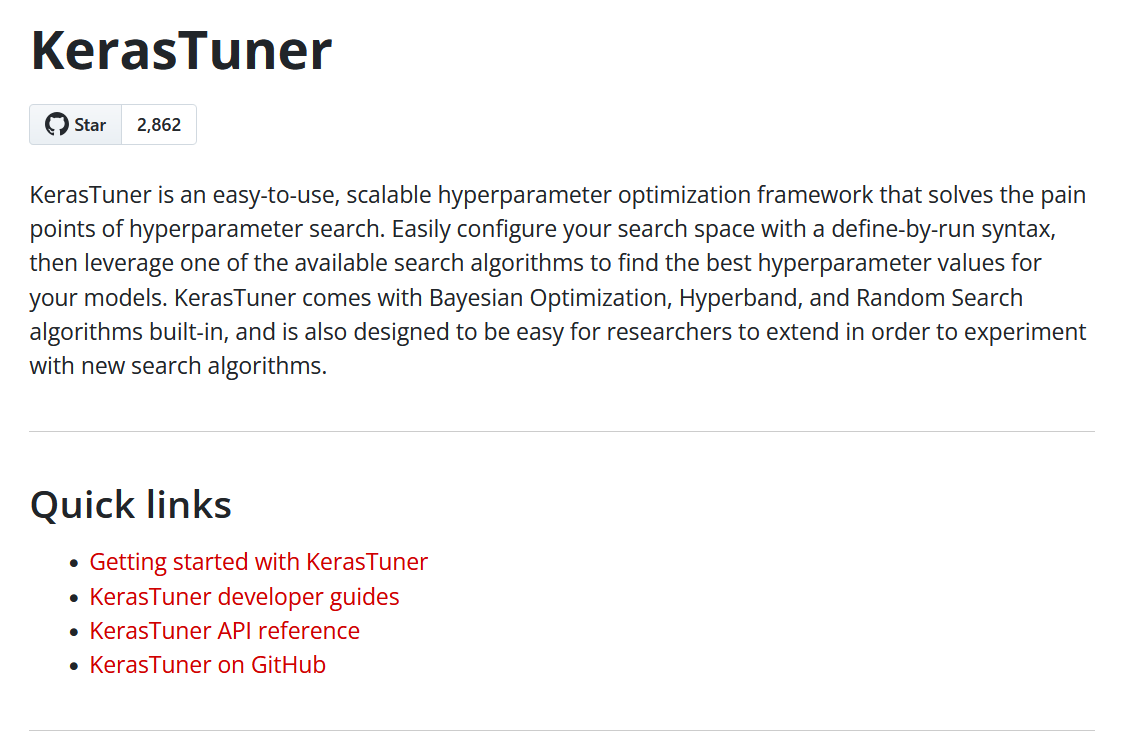

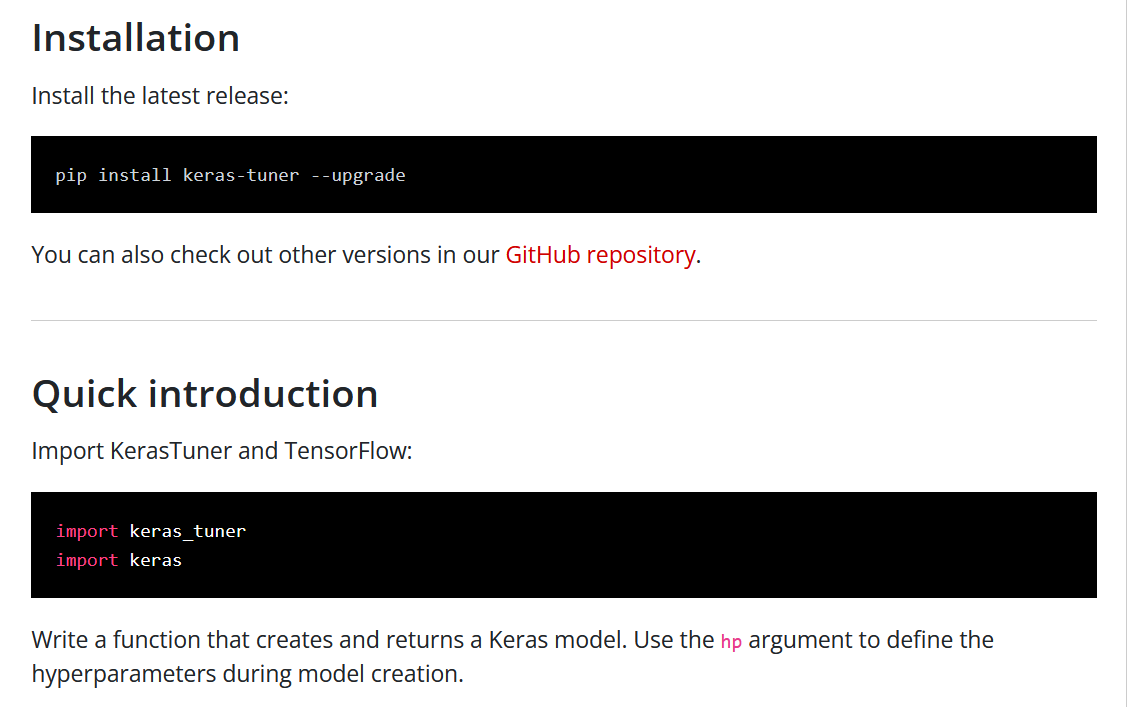

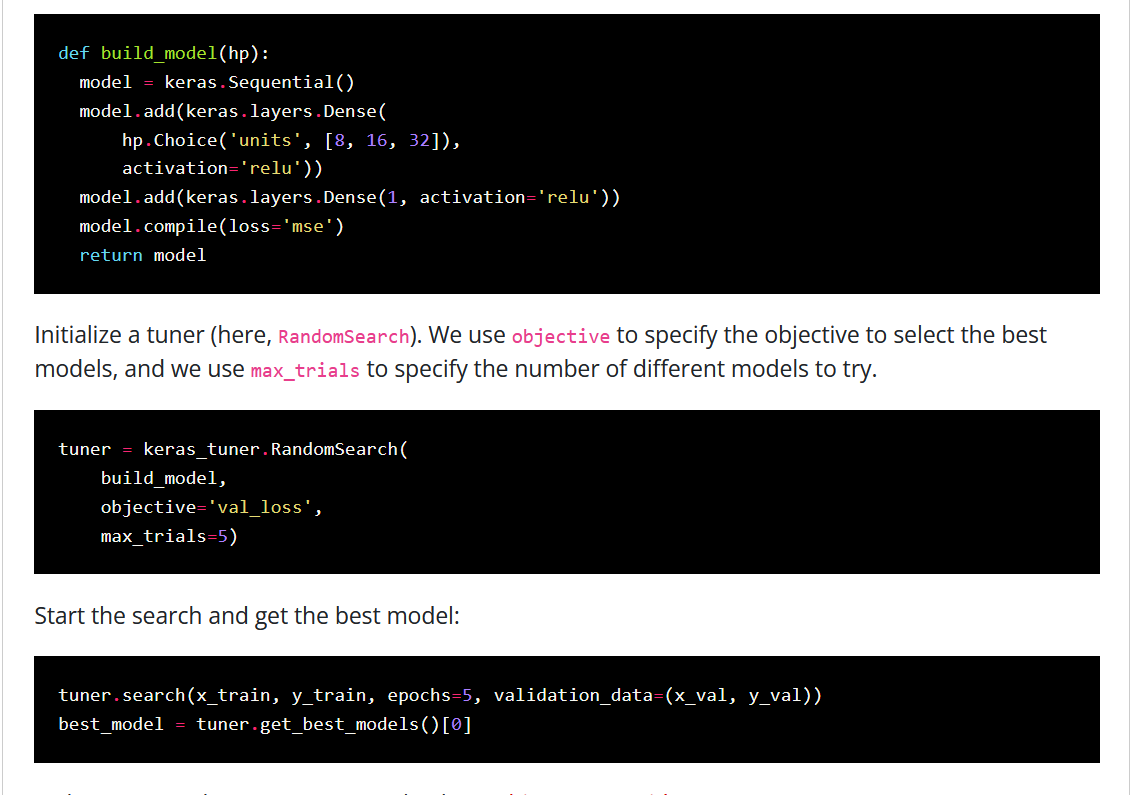

### Building KerasTuner model to decide how much layers , neurons , dropout is needed in model

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Dataset\\Churn_Modelling.csv')

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


## EDA

In [4]:
df.shape

(10000, 14)

### Data Preprocessing

In [5]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [6]:
df = df.iloc[: , 3:]

In [7]:
df.shape

(10000, 11)

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [10]:
df = pd.get_dummies(df , drop_first = True)

In [11]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [12]:
df['Geography_Germany'].value_counts()

0    7491
1    2509
Name: Geography_Germany, dtype: int64

In [13]:
df['Geography_Spain'].value_counts()

0    7523
1    2477
Name: Geography_Spain, dtype: int64

In [14]:
df['Gender_Male'].value_counts()

1    5457
0    4543
Name: Gender_Male, dtype: int64

In [15]:
x = df.drop(['Exited'] , axis = 1)

In [16]:
y = df.iloc[: , -4]

In [17]:
x.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [18]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

#### Check Balance

In [19]:
y.value_counts() / len(y) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

#### Split data in train test split

In [20]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 12 , stratify = y)

In [21]:
print(x_train.shape , x_test.shape, y_train.shape , y_test.shape)

(8500, 11) (1500, 11) (8500,) (1500,)


### Feature Scale

In [22]:
scaler = StandardScaler()

In [23]:
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train) , columns = x.columns)
x_test_sc = pd.DataFrame(scaler.transform(x_test) , columns = x.columns)

In [24]:
x_train_sc.shape

(8500, 11)

In [25]:
x_test_sc.shape

(1500, 11)

#### Import libraries for Deep Neural Network / MLP

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

### Hyperparaneter Tuning


#### 1.How many layers create
#### 2.How many nuerons create
#### 3.which activateion fun
#### 4.which optimization 
#### 5.Dropout percentage

#### Install keras tuner

In [27]:
# ! pip install keras-tuner --upgrade

#### Import keras tuner

In [28]:
import keras_tuner as kt

### Build keras tuner for best hyperparameter value of layers , neurons , optimization and activation function

In [29]:
def Build_model(hyper):
    
    model = Sequential()
    
    counter = 0  #counter is for increament to check first hideen layer & except than first layer
    
    # Normally we create 4 or 5 hidden layers only but this for just experiment purpose I took 6
    
    
    
    # The key difference between a normal for loop and the tuner:
    #Normal for loop: The range for i in range(1, 6) would normally iterate over values 1 to 5 
    #(not including 6). But here, you're not just looping through values; you're defining a 
    #search space for the tuner to explore.

    #Tuner behavior: The tuner will search for the best configuration of hyperparameters within 
    #the specified range, and it can indeed choose 6 layers as part of its search. The tuner will
    #try out configurations that include 1, 2, 3, 4, 5, or 6 layers, depending on what it finds 
    #to work best for the given task.
    
    
    for i in range(hyper.Int('Number_of_layers_' , 1 , 6)):
        # This line indicate here it create total 6 hidden layer beacuse in this tuner
        # (not for loop) so it is considering max value also so here min = 1 and max = 6
        # so it create 6 layers . (not 5) this is not formal for loop this is kerastuner
        
        # hyper is optional. you can take any name like self variable in oops but Int() is mandet.
        # hyper.Int is necessary if you want to automatically search for the best number of neurons 
        # and layers during hyperparameter tuning.
        
        if counter == 0:
            
        # counter=0 means this code execute when counter is 0.beacuse this code is for 1st hidden layer
        # we put input_dim so we want intentially execute this code when we 1st hidden layer
            
            model.add(Dense(units =hyper.Int( 'Number_of_neurons' + str(i) ,min_value = 2,max_value=256,
                step = 8 ), activation = hyper.Choice('Activation_'+ str(i), 
                values = ['relu' ,'leaky_relu' , 'sigmoid' , 'tanh']),input_dim = len(x.columns)))
            
            # min_value and max_value indicates create neurons in between 2 to 256 and step is 8 means
        # for next layer create extra 8 means 1st layer create 4 then next layer create 12 kind.
        # .choie() is automatically search best activation / hyperparameter from this list
            
            model.add(Dropout(hyper.Choice('Dropout_' + str(i) , 
                        values = [0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50])))
            # This is dropout rate , 
            # .choice is automatically searches best dropout rate
                  
    
        else:  
            
            # this is for hidden layer but other than 1st hidden layer 
            model.add(Dense(units = hyper.Int('Number_of_neurons' + str(i) ,min_value = 2,max_value=256,
                step = 8 ), activation = hyper.Choice('Activation_' + str(i), 
                values = ['relu' ,'leaky_relu' , 'sigmoid' , 'tanh'])))
            
            
            # This is dropout rate , 
            # .choice() is automatically searches best dropout rate
            model.add(Dropout(hyper.Choice('Dropout_' + str(i),
                    values = [0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50])))
            
            
        counter = counter + 1   # increament of counter
        
        
        # This is output layer
        model.add((Dense(units = 1 , activation = 'sigmoid')))
        
        # compile the kerastuner
        # .choice() automatically search best optimizers / hyperparameters from the list
        model.compile(optimizer = hyper.Choice('Optimizer_' +  str(i) , 
                    values = ['adam' , 'rmsprop' ,'sgd']) , loss = 'binary_crossentropy' ,
                     metrics = ['accuracy'])
        
        
    return model    # return value inside model give to function
    
    # we put return outside of loop because loop will iterate five times times and then naturally
    # get exahuasted and whatever data in model it return to function

### **Explanation:**

This code is using **Keras Tuner** to perform **random search** to tune the hyperparameters of a machine learning model. Here's what each part of the code means:

1. **`kt.RandomSearch`**:
   - `RandomSearch` is a hyperparameter tuning method provided by Keras Tuner.
   - It tries **random combinations** of the hyperparameters in the search space to find the best-performing model. It's like randomly exploring different options to see which one works best.
   
2. **`build_model`**:
   - This is the function that **builds** the model. It's the function you defined earlier (e.g., the `Build_model` function).
   - Keras Tuner will call this function repeatedly with different hyperparameters to build models and evaluate their performance.

3. **`objective='val_accuracy'`**:
   - This specifies what Keras Tuner should optimize (or look for the best performance in).
   - `'val_accuracy'` means that Keras Tuner will try to maximize the **validation accuracy** of the model. It's saying: "Try different hyperparameters and choose the one that gives the best accuracy on the validation data."

4. **`max_trials=5`**:
   - This tells Keras Tuner to run **5 different trials** (i.e., 5 different random combinations of hyperparameters).
   - In each trial, Keras Tuner will build and evaluate a model with different hyperparameter values. After 5 trials, it will stop.

5. **`directory='mydir'`**:
   - This is the **directory** where the tuning results (e.g., models, logs) will be saved.
   - In this case, it's saving the results in a folder called `'mydir'`.

6. **`project_name='hyperparameter'`**:
   - This is the **project name** for the tuning session.
   - All results related to this hyperparameter tuning experiment will be saved inside a folder named `'hyperparameter'` within the `'mydir'` directory.
   
### **Summary**:
This code is setting up a random search process to find the best model by tuning its hyperparameters. Keras Tuner will:
- Try 5 different combinations of hyperparameters (as specified by `max_trials=5`).
- For each combination, it will build a model using the `build_model` function and evaluate it based on the **validation accuracy** (`objective='val_accuracy'`).
- The tuning results will be saved in a folder named `'hyperparameter'`, which is inside the `'mydir'` directory.

**In simpler terms**: It's like experimenting with 5 different configurations of your model's settings (such as the number of layers, number of neurons, activation functions, etc.) and choosing the one that performs the best on the validation data.

#### Tune your hyperparameter

In [30]:
tuner = kt.RandomSearch(Build_model , objective = 'val_accuracy' , max_trials = 8 , 
                        directory = 'mydir' , project_name = 'Hyperparameters_DNN' )   
# RandomSearch is method is tune your hyperparameters (we set in above code)
# Build_model is the function where you create sequential model for find best parameters and it
# used return keyword means return is return everything inside function means whatever sequential model get build that data inside the build_model.
# kerastuner will maximize validation accuracy
# max_trials = 8 means 8 times keras tuner will build sequential model
# and evaluate accuracy with random_combinations and gives best accuracy from 8 random comb
# directory = its stored the tuning results
# project_name = under the name of directory store the trial data inside project_name file


Reloading Tuner from mydir\Hyperparameters_DNN\tuner0.json


### Now train the keras tuner model

In [31]:
tuner.search(x_train_sc , y_train , epochs = 10 , validation_data = (x_test_sc , y_test))

Trial 8 Complete [00h 00m 22s]
val_accuracy: 0.7960000038146973

Best val_accuracy So Far: 0.7960000038146973
Total elapsed time: 00h 32m 58s


### kerasTuner is ready for train and search the best model and performs 10 epochs(per trial) and get best accuracy from it.
#### here each trial perform 10 epochs so here it perform 80 epochs. I want to perform 10 epochs for every trial.
#### It train kerastuner for 8 times because we give 8 trials means model get build for 8 times and give accuracy for each 8 time and gives final best accuracy on overall performance

#### 8 trial accuracy is 0.7960000038146973 and from all trials best accuracy is 0.7960000038146973

#### This line of code training the model as well as search the best model and performs 10 epochs and showing 10 accuracies per epoch and showing best accuracy is  0.7960000038146973

### Show best hyperparameters

#### It tell how many number of layers is need to create for best accuracy as well it tell other parameters also
#### [0] indicates get best hyperparameter from list of best hyperparameters
#### [0] refers to the best result or the best hyperparameters in the list returned by tuner.get_best_hyperparameters(). 


#### tuner.get_best_hyperparameters()[0] gives you the best set of hyperparameters (i.e., the values of parameters like number of layers, number of neurons, activation functions, dropout rates, etc.) that produced the best performance.

In [47]:
tuner.get_best_hyperparameters()[0].values

{'Number_of_layers_': 6,
 'Number_of_neurons0': 202,
 'Activation_0': 'leaky_relu',
 'Dropout_0': 0.5,
 'Optimizer_0': 'adam',
 'Number_of_neurons1': 90,
 'Activation_1': 'relu',
 'Dropout_1': 0.25,
 'Optimizer_1': 'rmsprop',
 'Number_of_neurons2': 178,
 'Activation_2': 'relu',
 'Dropout_2': 0.2,
 'Optimizer_2': 'rmsprop',
 'Number_of_neurons3': 138,
 'Activation_3': 'leaky_relu',
 'Dropout_3': 0.1,
 'Optimizer_3': 'rmsprop',
 'Number_of_neurons4': 226,
 'Activation_4': 'sigmoid',
 'Dropout_4': 0.2,
 'Optimizer_4': 'adam',
 'Number_of_neurons5': 10,
 'Activation_5': 'relu',
 'Dropout_5': 0.4,
 'Optimizer_5': 'rmsprop'}

#### Here it create 6 layers and as per best accuracy it gives best hyperparameters

#### Here , as per kerastuner , how many layers need to be create i.e. 6 layer . (First line indicates how many layers suugest by kerastuner)
#### and rest of lines are nothing but we give 6 layers in for loop so it just execute 6 layers naturally and give best hyperparamter for each layer as per keras


### Now We get best models

#### This line pf code shows , gives best model and the it gives that model which is present at the 0th index which is most accurate

In [50]:
model = tuner.get_best_models(num_models = 1)[0]

In [51]:
model

<Sequential name=sequential, built=True>

#### Train the MLP model

In [52]:
history = model.fit(x_train_sc,y_train,batch_size=32,epochs=40,initial_epoch=10,validation_data=(x_test_sc , y_test))

Epoch 11/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7907 - loss: 0.5370 - val_accuracy: 0.7960 - val_loss: 0.5082
Epoch 12/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7974 - loss: 0.5254 - val_accuracy: 0.7960 - val_loss: 0.5077
Epoch 13/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.5171 - val_accuracy: 0.7960 - val_loss: 0.5071
Epoch 14/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.5127 - val_accuracy: 0.7960 - val_loss: 0.5067
Epoch 15/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7956 - loss: 0.5161 - val_accuracy: 0.7960 - val_loss: 0.5069
Epoch 16/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7894 - loss: 0.5211 - val_accuracy: 0.7960 - val_loss: 0.5061
Epoch 17/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7970 - loss: 0.5117 - val_accuracy: 0.7960 - val_loss: 0.5061
Epoch 18/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7900 - loss: 0.5199 - val_accu

#### Here , we train the MLP model on basis of best hyperparameters which is givesn by kerastuner.
#### initial_epoch = 10 , means here we say we already did 10 epochs and we give 40 epochs so now it performs only 30 epochs now . we noticed epochs start at 11 and stops at 40.   

#### Performance be like accuracy: 0.8000 - loss: 0.5004 - val_accuracy: 0.7960 - val_loss: 0.5058
#### Model is not overfitted